In [372]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample_submission_pzljTaX.csv
/kaggle/input/train_0irEZ2H.csv
/kaggle/input/test_nfaJ3J5.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_log_error,mean_squared_error

from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import ModelCheckpoint

In [474]:
train=pd.read_csv('/kaggle/input/train_0irEZ2H.csv')
test=pd.read_csv('/kaggle/input/test_nfaJ3J5.csv')
sub=pd.read_csv('/kaggle/input/sample_submission_pzljTaX.csv')

In [475]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [476]:
# other_prod=[673209,327492,545621]

# def product_name(x):
#     if x in other_prod:
#         return 0
#     else:
#         return x

# train['sku_id'] = train['sku_id'].apply(product_name)
# test['sku_id'] = test['sku_id'].apply(product_name)

In [477]:
train[train['sku_id']==0].head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold


In [478]:
train['sku_id'].head()

0    216418
1    216419
2    216425
3    216233
4    217390
Name: sku_id, dtype: int64

In [479]:
train.dropna(inplace=True)

In [480]:
train['day'] = train['week'].apply(lambda x: x.split('/')[0])
train['month'] = train['week'].apply(lambda x: x.split('/')[1])
train['year'] = train['week'].apply(lambda x: x.split('/')[2])
test['day'] = test['week'].apply(lambda x: x.split('/')[0])
test['month'] = test['week'].apply(lambda x: x.split('/')[1])
test['year'] = test['week'].apply(lambda x: x.split('/')[2])

In [481]:
train['difference'] = (train['base_price'] - train['total_price'])/train['base_price']
test['difference'] = (test['base_price'] - test['total_price'])/train['base_price']

In [482]:
drop_cols=['week','base_price','record_ID'] 

In [483]:
train.drop(drop_cols,axis=1,inplace=True)
test.drop(drop_cols,axis=1,inplace=True)

In [484]:
train['units_sold'].max()

2876

In [485]:
train['units_sold'].min()

1

In [486]:
dummie_col = ['sku_id','store_id']

In [487]:
train_1 = pd.get_dummies(train,columns=dummie_col,drop_first=True)
test_1 = pd.get_dummies(test,columns=dummie_col,drop_first=True)

In [488]:
test_1.head()

,total_price,is_featured_sku,is_display_sku,day,month,year,difference,sku_id_216418,sku_id_216419,sku_id_216425,sku_id_217217,sku_id_217390,sku_id_217777,sku_id_219009,sku_id_219029,sku_id_219844,sku_id_222087,sku_id_222765,sku_id_223153,sku_id_223245,sku_id_245338,sku_id_245387,sku_id_300021,sku_id_300291,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,store_id_8869,store_id_8911,store_id_8991,store_id_9001,store_id_9043,store_id_9092,store_id_9112,store_id_9132,store_id_9147,store_id_9164,store_id_9178,store_id_9190,store_id_9221,store_id_9250,store_id_9273,store_id_9279,store_id_9281,store_id_9328,store_id_9371,store_id_9425,store_id_9430,store_id_9432,store_id_9436,store_id_9439,store_id_9442,store_id_9456,store_id_9479,store_id_9481,store_id_9490,store_id_9498,store_id_9532,store_id_9578,store_id_9611,store_id_9613,store_id_9632,store_id_9672,store_id_9680,store_id_9700,store_id_9713,store_id_9731,store_id_9745,store_id_9770,store_id_9789,store_id_9809,store_id_9813,store_id_9823,store_id_9837,store_id_9845,store_id_9872,store_id_9876,store_id_9879,store_id_9880,store_id_9881,store_id_9890,store_id_9909,store_id_9954,store_id_9961,store_id_9984
0,108.3000,0,0,16,07,13,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,109.0125,0,0,16,07,13,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,133.9500,0,0,16,07,13,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,133.9500,0,0,16,07,13,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,176.7000,0,0,16,07,13,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


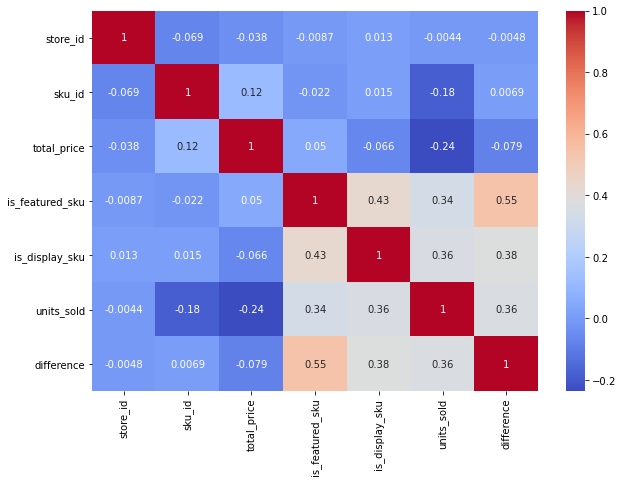

In [489]:
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(),cmap='coolwarm',annot=True)

In [490]:
X=train_1.drop(['units_sold'],axis=1)
y=train_1['units_sold']

In [491]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [492]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test_2 = scaler.transform(test_1)

In [493]:
# cv_lr = cross_val_score(LinearRegression(),X=X_train,y=y_train,cv=5)
# print(cv_lr.mean())
# print(cv_lr.std())

In [494]:
# cv_rf = cross_val_score(RandomForestRegressor(),X=X_train,y=y_train,cv=5)
# print(cv_rf.mean())
# print(cv_rf.std())

In [495]:
# cv_xgb = cross_val_score(XGBRegressor(),X=X_train,y=y_train,cv=5)
# print(cv_xgb.mean())
# print(cv_xgb.std())

In [496]:
# cv_svm = cross_val_score(SVR(),X=X_train,y=y_train,cv=5)
# print(cv_svm.mean())
# print(cv_svm.std())

In [443]:
xgb=XGBRegressor(random_state=101)

In [444]:
xgb = xgb.fit(X_train,y_train)

In [445]:
pred_xgb = xgb.predict(X_test)

In [446]:
pred_xgb[pred_xgb<0]

array([ -3.4122136 ,  -0.9725801 ,  -3.4276197 , -21.307556  ,
        -0.18082196,  -0.13634664,  -0.18617946, -18.772709  ,
        -0.62947583,  -8.033651  ,  -0.93218875,  -0.9336461 ,
       -14.224879  ,  -6.852274  ,  -0.70760775,  -1.2677526 ,
        -0.12901771], dtype=float32)

In [447]:
y_test[y_test<0]

Series([], Name: units_sold, dtype: int64)

In [448]:
df = pd.DataFrame()
df['Original']=y_test
df['Prediction']=pred_xgb

In [449]:
df[df['Prediction']<0]

,Original,Prediction
87975,4,-3.412214
70564,4,-0.972580
32525,3,-3.427620
71088,4,-21.307556
88900,14,-0.180822
117264,11,-0.136347
57934,12,-0.186179
8090,49,-18.772709
111064,20,-0.629476
92947,14,-8.033651


In [450]:
df['Prediction']=df['Prediction'].apply(lambda x:x if x>0 else -x)

In [451]:
mean_squared_error(y_test,pred_xgb)**0.5

27.785908043967655

In [452]:
mean_squared_log_error(df['Original'],df['Prediction'])

0.2203472636064626

In [453]:
mean_squared_error(y_test,pred_xgb)**0.5

27.785908043967655

In [500]:
X_train.shape

(120119, 109)

In [501]:
model=Sequential()

model.add(Dense(109,input_shape=(109,),activation='relu'))

model.add(Dense(256,activation='relu'))

model.add(Dense(256,activation='relu'))

model.add(Dense(256,activation='relu'))

model.add(Dense(1,activation='relu'))

model.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [502]:
checkpoint_name = 'weights.best.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_mse', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [505]:
model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test),callbacks=callbacks_list)

Epoch 1/100
3734/3754 [============================>.] - ETA: 0s - loss: 706.4611 - mse: 706.4611
Epoch 00001: val_mse improved from 839.09979 to 766.95428, saving model to weights.best.hdf5
3754/3754 [==============================] - 11s 3ms/step - loss: 705.7227 - mse: 705.7227 - val_loss: 766.9543 - val_mse: 766.9543
Epoch 2/100
3737/3754 [============================>.] - ETA: 0s - loss: 675.0826 - mse: 675.0826
Epoch 00002: val_mse improved from 766.95428 to 647.11487, saving model to weights.best.hdf5
3754/3754 [==============================] - 11s 3ms/step - loss: 673.3439 - mse: 673.3439 - val_loss: 647.1149 - val_mse: 647.1149
Epoch 3/100
3746/3754 [============================>.] - ETA: 0s - loss: 630.6495 - mse: 630.6495
Epoch 00003: val_mse did not improve from 647.11487
3754/3754 [==============================] - 11s 3ms/step - loss: 630.6190 - mse: 630.6190 - val_loss: 678.9831 - val_mse: 678.9831
Epoch 4/100
3751/3754 [============================>.] - ETA: 0s - loss:

Epoch 29/100
3754/3754 [==============================] - ETA: 0s - loss: 334.5898 - mse: 334.5898
Epoch 00029: val_mse did not improve from 557.58405
3754/3754 [==============================] - 11s 3ms/step - loss: 334.5898 - mse: 334.5898 - val_loss: 591.1332 - val_mse: 591.1332
Epoch 30/100
3753/3754 [============================>.] - ETA: 0s - loss: 331.1129 - mse: 331.1129
Epoch 00030: val_mse did not improve from 557.58405
3754/3754 [==============================] - 11s 3ms/step - loss: 331.1396 - mse: 331.1396 - val_loss: 598.7080 - val_mse: 598.7080
Epoch 31/100
3753/3754 [============================>.] - ETA: 0s - loss: 329.7991 - mse: 329.7991
Epoch 00031: val_mse did not improve from 557.58405
3754/3754 [==============================] - 10s 3ms/step - loss: 329.7482 - mse: 329.7482 - val_loss: 583.0815 - val_mse: 583.0815
Epoch 32/100
3746/3754 [============================>.] - ETA: 0s - loss: 327.5293 - mse: 327.5293
Epoch 00032: val_mse did not improve from 557.58405


Epoch 58/100
3751/3754 [============================>.] - ETA: 0s - loss: 254.7342 - mse: 254.7342
Epoch 00058: val_mse did not improve from 536.43457
3754/3754 [==============================] - 11s 3ms/step - loss: 254.7722 - mse: 254.7722 - val_loss: 549.9271 - val_mse: 549.9271
Epoch 59/100
3746/3754 [============================>.] - ETA: 0s - loss: 252.8034 - mse: 252.8034
Epoch 00059: val_mse did not improve from 536.43457
3754/3754 [==============================] - 11s 3ms/step - loss: 252.7271 - mse: 252.7271 - val_loss: 577.7384 - val_mse: 577.7384
Epoch 60/100
3744/3754 [============================>.] - ETA: 0s - loss: 252.9786 - mse: 252.9786
Epoch 00060: val_mse did not improve from 536.43457
3754/3754 [==============================] - 13s 3ms/step - loss: 253.1024 - mse: 253.1024 - val_loss: 569.4504 - val_mse: 569.4504
Epoch 61/100
3742/3754 [============================>.] - ETA: 0s - loss: 250.7885 - mse: 250.7885
Epoch 00061: val_mse did not improve from 536.43457


Epoch 87/100
3744/3754 [============================>.] - ETA: 0s - loss: 219.0687 - mse: 219.0687
Epoch 00087: val_mse did not improve from 526.26416
3754/3754 [==============================] - 11s 3ms/step - loss: 219.0499 - mse: 219.0499 - val_loss: 546.6777 - val_mse: 546.6777
Epoch 88/100
3754/3754 [==============================] - ETA: 0s - loss: 217.6028 - mse: 217.6028
Epoch 00088: val_mse did not improve from 526.26416
3754/3754 [==============================] - 11s 3ms/step - loss: 217.6028 - mse: 217.6028 - val_loss: 537.7134 - val_mse: 537.7134
Epoch 89/100
3744/3754 [============================>.] - ETA: 0s - loss: 218.3993 - mse: 218.3993
Epoch 00089: val_mse did not improve from 526.26416
3754/3754 [==============================] - 12s 3ms/step - loss: 218.4972 - mse: 218.4972 - val_loss: 545.9493 - val_mse: 545.9493
Epoch 90/100
3750/3754 [============================>.] - ETA: 0s - loss: 219.4537 - mse: 219.4537
Epoch 00090: val_mse did not improve from 526.26416


In [506]:
losses=pd.DataFrame(model.history.history)

In [507]:
losses.head()

,loss,mse,val_loss,val_mse
0,705.722717,705.722717,766.954285,766.954285
1,673.343872,673.343872,647.114868,647.114868
2,630.618958,630.618958,678.983093,678.983093
3,608.508606,608.508606,714.268738,714.268738
4,568.169983,568.169983,636.936951,636.936951


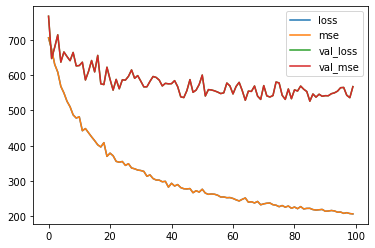

In [508]:
losses.plot()

In [511]:
model=Sequential()

model.add(Dense(109,input_shape=(109,),activation='relu'))

model.add(Dense(256,activation='relu'))

model.add(Dense(256,activation='relu'))

model.add(Dense(256,activation='relu'))

model.add(Dense(1,activation='relu'))

In [512]:
model.load_weights("weights.best.hdf5")
model.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [513]:
predi=model.predict(X_test)

In [514]:
mean_squared_error(y_test,predi)**0.5

22.94045729203967

In [515]:
mean_squared_log_error(y_test,predi)**0.5

0.3916679064541272

In [516]:
prediT = model.predict(test_2)

In [517]:
sub['units_sold'] = prediT
sub.to_csv('sub_Neural_demand_forecasting_best_5.csv',index=False)

In [518]:
sub.head(30)

,record_ID,units_sold
0,212645,23.820107
1,212646,24.760914
2,212647,24.673529
3,212648,25.212082
4,212649,26.155598
5,212653,25.874279
6,212654,36.203400
7,212657,14.672345
8,212658,14.579322
9,212661,186.129456


In [339]:
sub.head(30)

,record_ID,units_sold
0,212645,19.666571
1,212646,23.442719
2,212647,22.577429
3,212648,25.810513
4,212649,25.702442
5,212653,22.969572
6,212654,35.629749
7,212657,13.320879
8,212658,11.669260
9,212661,188.362167
